                                                                                                        Samantha Gregoryk
                                                                                                        Cpts215 Section 1
                                                                                                        September 29th, 2019

# PA2

## K Means Clustering 

In [177]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [211]:
class K_Means:
    def __init__(self, k = 2, tolerance = 0.0001, max_iterations = 500):
        '''
        Method that is automatically 
        called when memory is allocated 
        for a new object.
        '''
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def cluster(self, data):
        '''
        Main function to execute k-means 
        clustering. This will initlize 
        random clusters, then create 
        centroids with the first 
        elements as k in our dataset. 
        Then, we start our iteration and 
        find the distance between each cluster
        while chosing the nearest centroid.
        Finally, we determine the distance 
        of each centroid and assign the 
        nearest one to that centroid.
        '''
        #Create atribute centroid
        self.centroids = {}

        #Create centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #Begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #Use Euclidean distance to find the distance between the point and cluster 
            for features in data:
                dist = [np.sqrt(np.sum(features - self.centroids[centroid])**2) for centroid in self.centroids]
                
                #Find nearest centroid
                c = dist.index(min(dist))
                self.classes[c].append(features)

            previous = dict(self.centroids)

            #Average the cluster data points to re-calculate the centroids
            for c in self.classes:
                self.centroids[c] = np.average(self.classes[c], axis = 0)
            
            #Oringial boolean
            x = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                #Begin convergence
                if np.sum((curr - original_centroid)/original_centroid) > self.tolerance:
                    x = False
                    
            #Break out of for loop if true
            if x:
                break

def plot_data(data):
    '''
    Shows a heatmap to help 
    visulize and understand 
    our data before and after 
    k-means clustering.
    '''
    fig, ax = plt.subplots()
    d = plt.imshow(data, cmap = 'rainbow')
    plt.colorbar(d)
    ax.set_aspect('auto')
    plt.show()


### Simple.csv

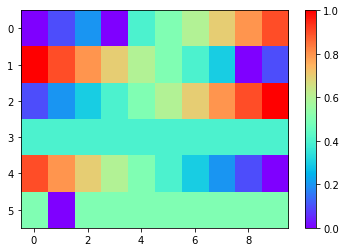

C:\Users\Samgr\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide


TypeError: Invalid shape (10,) for image data

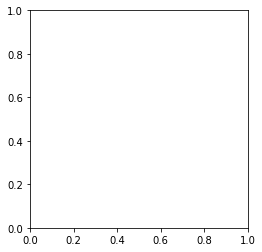

In [212]:
def main():
    '''
    Where functions and variables
    are executed for simple.csv.
    '''

    df = pd.read_csv("simple.csv", index_col = 0, header = None) #Reads a file in csv format 
   
    X = df.values #Array with values from simple.csv
    plot_data(X) #Plots original data

    km = K_Means(2) #Creates object from class with 2 k's
    km.cluster(X) #Using defintion cluster from class
    
    for classification in km.classes:
        for features in km.classes[classification]:
            plt.imshow(features, cmap = 'rainbow')
main()

### Cancer.csv

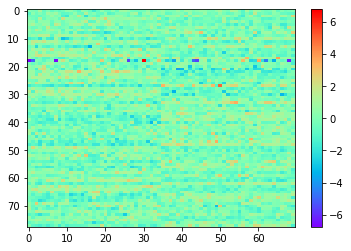

TypeError: Invalid shape () for image data

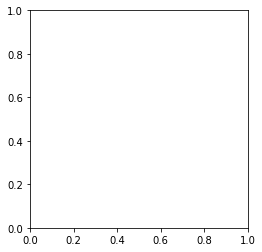

In [213]:
def main():
    '''
    Where functions and variables
    are executed for cancer.csv.
    '''

    df = pd.read_csv("cancer.csv", index_col = 0, header = None) #Reads a file in csv format 
   
    X = df.values #Array with values from simple.csv
    plot_data(X) #Plots original data

    km = K_Means(2) #Creates object from class with 2 k's
    km.cluster(X) #Using defintion cluster from class
    
    for classification in km.classes:
        for features in km.classes[classification]:
            plt.imshow(features, cmap = 'rainbow')
main()

## Discussion

#### Clustering patterns

Since these data structures were unsupervised (no correlations), we had to look for patterns from the original to the k-means clustered data. Unfortunately, I was close to finishing this assignment but could not find the right dimensions for my heatmaps to work, so I am referring to the heatmaps shown on the assignment. From what I can tell, the grouping of data shows that the there is a distinctive gene expression between the two classes of patient. 

#### Similarities and Differences


A similarity in using k-means clustering is showing how alike two data points are and clustering them in the same group. A disimilarity is could be the Euclidean distance for example because it compares how different each point is to eachother. 

#### Strengths and Weaknesses

Some stengths I noticed with k-means clustering is the visual representation of the data. It is much easier with bigger data sets to see patterns because of the data clustering together. 
A weakness I noticied with k-means clustering is manually determining k. Thankfully for this assignment, k was given to us but when I was researching, I noticied a something called the 'elbow technique' which put into perspective on what K should ultimately be. 